In [337]:
#%pip list #| grep requests

Package             Version
------------------- -----------
appnope             0.1.2
argon2-cffi         20.1.0
async-generator     1.10
attrs               23.2.0
backcall            0.2.0
beautifulsoup4      4.12.3
bleach              3.3.1
blinker             1.8.1
Brotli              1.1.0
certifi             2024.2.2
cffi                1.14.6
charset-normalizer  3.3.2
cmudict             0.4.5
contourpy           1.2.1
cryptography        42.0.5
cycler              0.12.1
debugpy             1.4.1
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
exceptiongroup      1.2.1
fonttools           4.51.0
gensim              4.3.2
h11                 0.14.0
h2                  4.1.0
hpack               4.0.0
hyperframe          6.0.1
idna                3.7
importlib_resources 6.4.0
instagramy          4.5
ipykernel           6.0.3
ipython             7.25.0
ipython-genutils    0.2.0
ipyturtle           0.2.4
ipywidgets          7.6.3
jedi                0.18.

In [5]:
#%pip install scipy==1.10.1

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Final Project -- Data Portraiture Methodology Exploration
In this final project, I explore the potential and the challenges of a methodology that seeks to make sense of the social media usage by analyzing highly granular data from the social media accounts of individual users. This methodological exploration is built upon two methodological and theoretical foundations. The first is that of the Portraiture methodology developed by Sara Lawrence-Lightfoot (Lawrence-Lightfoot and Davis, 2002). This methodology makes use of an intentional mixture of aesthetics and empirics to craft a richly-detailed, written portrait of a single subject. In doing so, a portrait hopes to reveal universally resonate themes, ideas, and experiences within a particular subject. Distinct from other qualitative methodologies like ethnography, portraiture tasks the portraitist with listening for a story rather than listening to a story in an attempt to discern the essence of goodness within the subject.

Second, this method, in particular in its application to social media, enables a practice of sousveillence: "acts of 'observing and recording by an entity not in a position of power or authority over the subject of the veillance,' often done through the use of handheld or wearable cameras" (Browne, 2015, quoting Mann, 2003). While social media companies are constantly collecting untold amounts of data about users' behavior, users do not have the same power to look back at the companies and instead are restricted to seeing media that algorithms bubble up to the surface of social media feeds. By creating a methodology to investigate data that platforms are already making use of, this data portraiture method presents a tool for users to don a metaphorical "handheld camera," turning the lens on the platforms.

Specifically, this exploration draws from data which users can request from Instagram. This dataset includes a variety of features from direct messages to items purchased in the Instagram shop. This exploration is currently limited to logs of "like" actions that users perform on Instagram posts. These logs include the timestamp that the action was made, a link to the post that was liked, and the username of the user who posted the post (what I call the "poster" for clarity). Additionally, this exploration performs primary data collection by scraping the bio text from certain users which are included in the logs. This bio text is short (64 characters on average) and generally includes basic descriptions of what the account often posts.

As a methodological exploration, this project does not seek to answer any specific research questions, but instead to serve an an initial foray into what can be done in this realm with these motivations as well as document challenges which will need to be addressed to achieve these goals.


In [350]:
import time
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


## Data retrival and preparation
First, I developed code to read in data pulled from Instagram by a friend and shared with me. This data was in JSON form, but I converted it to a pandas Dataframe. Additionally, I cleaned the timestamp feature, converting it into a timestamp type so that it would be easier to read and manipulate.

In [351]:
f = open("data/user_1/liked_posts.json")
likes = json.load(f)
f.close()
likes = likes["likes_media_likes"]

In [352]:
likes

[{'title': 'chloe.shih',
  'string_list_data': [{'href': 'https://www.instagram.com/reel/C2DohWkvlt2/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1705344401}]},
 {'title': 'therewillbetrivia',
  'string_list_data': [{'href': 'https://www.instagram.com/reel/C1u1JvCSWod/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1705344315}]},
 {'title': 'studiocloclo',
  'string_list_data': [{'href': 'https://www.instagram.com/reel/C2G0Nhcs_lr/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1705343885}]},
 {'title': 'foosinmedicine',
  'string_list_data': [{'href': 'https://www.instagram.com/reel/C2A2v-vvv36/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1705307661}]},
 {'title': 'lifeasravennn',
  'string_list_data': [{'href': 'https://www.instagram.com/reel/C12cSAePhp6/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1705307519}]},
 {'title': 'studiocloclo',
  'string_list_data': [{'href': 'https://www.instagram.com/p/C2Gss1nsLvB/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1705

In [353]:
likes_dict = {"time":[], "user": [], "href": []}
for like in likes:
    user = like["title"]
    time = like["string_list_data"][0]["timestamp"]
    href = like["string_list_data"][0]["href"]
    likes_dict["time"].append(time)
    likes_dict["user"].append(user)
    likes_dict["href"].append(href)

In [354]:
likes_dict

{'time': [1705344401,
  1705344315,
  1705343885,
  1705307661,
  1705307519,
  1705288603,
  1705283691,
  1705273415,
  1705273336,
  1705273193,
  1705272613,
  1705272503,
  1705272492,
  1705272427,
  1705272312,
  1705272008,
  1705262554,
  1705262529,
  1705262515,
  1705229139,
  1705228295,
  1705228140,
  1705227584,
  1705227188,
  1705227061,
  1705227025,
  1705226869,
  1705220312,
  1705220067,
  1705220039,
  1705219942,
  1705219921,
  1705219889,
  1705219865,
  1705219766,
  1705219683,
  1705219466,
  1705219432,
  1705219418,
  1705219355,
  1705219265,
  1705218601,
  1705218544,
  1705218310,
  1705218255,
  1705218237,
  1705218138,
  1705218079,
  1705218022,
  1705217774,
  1705217698,
  1705217661,
  1705217070,
  1705217042,
  1705216890,
  1705216833,
  1705216468,
  1705216421,
  1705216263,
  1705216212,
  1705216170,
  1705215803,
  1705215776,
  1705215684,
  1705215604,
  1705215544,
  1705215499,
  1705215434,
  1705215370,
  1705215335,
  1705215217

In [355]:
df = pd.DataFrame(likes_dict)

In [356]:
df["time"] = pd.to_datetime(df["time"], unit='s')

In [357]:
df.head()

,time,user,href
0,2024-01-15 18:46:41,chloe.shih,https://www.instagram.com/reel/C2DohWkvlt2/
1,2024-01-15 18:45:15,therewillbetrivia,https://www.instagram.com/reel/C1u1JvCSWod/
2,2024-01-15 18:38:05,studiocloclo,https://www.instagram.com/reel/C2G0Nhcs_lr/
3,2024-01-15 08:34:21,foosinmedicine,https://www.instagram.com/reel/C2A2v-vvv36/
4,2024-01-15 08:31:59,lifeasravennn,https://www.instagram.com/reel/C12cSAePhp6/


## Exploratory data analysis
Next, I performed an exploratory data analysis on this data. I was particularly interested in understanding
the ratio of unique posters to likes as well as patterns of like action over time. The poster/like ratio is important because it holds weight for the viability of a topic model analysis of posters to accurately describe a user's behavior over time. If there are few posters that repeatedly show up in a user's activity log, it will be hard to identify patterns over time since there are fewer users that are spread throughout the activity. In the case of this user, the poster/like log is relatively high, meaning that many posters must have only been liked once or twice. While this is a challenge for the analysis I hope to perform, a histogram of likes reveals that there are a number of posters who have at least 10 likes in the dataset. Hopefully, this will allow for some usefulness of the topic model, even if the logs are not ideal.

In [358]:
# number of posts liked over 6 month period
len(df)

1576

In [359]:
# number of unique users engaged with during this time
unique_users = set(df["user"])
len(unique_users)

839

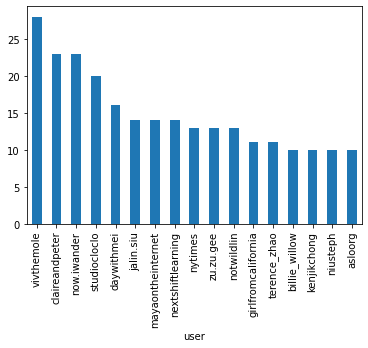

In [360]:
most_liked = df.groupby("user").filter(lambda x: len(x) > 9)["user"].value_counts()
ax = most_liked.plot.bar()


<Axes: xlabel='time'>

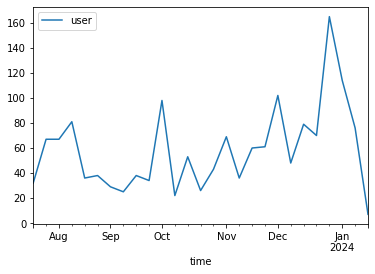

In [361]:
df.set_index("time")[['user']].resample('W').count().plot()
# df[['time']].resample('M')#.count()


## Topic Modeling
Next, I used the Gensim package to perform topic modeling on the poster/like data. To perform this analysis, I transform the data into a DFM where each week is a document and each poster the user liked in that week is a term. The DFM has this form:

            user_1 | user_2 | user_3
    week_1    3        0        4
    week_2    0        6        2
    week_3    3        4        6
    
I used this DFM to create a dictionary and a corpus with which to train an LDA topic model with 10 topics. I then constructed a DF with these 10 topics and their distribution to be used later.

### Make dictionary and corpus for topic modeling

In [362]:
from gensim import corpora, models

In [363]:
weekly_counts = df.set_index("time").resample('W').agg('sum')

    #     {'result': lambda x: x.join()})

weekly_counts.head()

,user,href
time,,
2023-07-23,bonito_beethe_avambaltimorebannerlatimes.404ni...,https://www.instagram.com/p/Cu2XXxVrOv8/https:...
2023-07-30,romeoumanaasloorgtheatercampthemovietheatercam...,https://www.instagram.com/p/CvGYon1MQ9I/https:...
2023-08-06,zu.zu.geelaparasianeasypeasychineseymortgagewi...,https://www.instagram.com/p/CvVq5kNvWky/https:...
2023-08-13,jasminewsunvivthemolejsmn_drawsoverheardnewyor...,https://www.instagram.com/p/CvnVXGOvF3g/https:...
2023-08-20,_lucerodenisseelyse_myersthealicehendersonn_ga...,https://www.instagram.com/p/Cv58Oh1pyyZ/https:...


In [364]:
weekly_counts = df.set_index("time")[['user']].resample('W').agg(
    lambda x: x)

    #     {'result': lambda x: x.join()})

weekly_counts['user']

time
2023-07-23    [bonito_bee, the_avam, baltimorebanner, latime...
2023-07-30    [romeoumana, asloorg, theatercampthemovie, the...
2023-08-06    [zu.zu.gee, laparasian, easypeasychinesey, mor...
2023-08-13    [jasminewsun, vivthemole, jsmn_draws, overhear...
2023-08-20    [_lucerodenisse, elyse_myers, thealicehenderso...
2023-08-27    [shivani_ghate, willieyeh, kelsers202, tabishg...
2023-09-03    [laurenjue, kariabundiz, siah_nara, eunhaebara...
2023-09-10    [florawangg, nathanslee97, l_cabbage_, danielk...
2023-09-17    [siah_nara, daniel_zhang98, apoorlydrawnbird, ...
2023-09-24    [sabrinafreyart, its_me_niche, realstiffy, zau...
2023-10-01    [terence_zhao, csteph_travel, thedailyshow, eg...
2023-10-08    [yawny_rawny, bow.ty.pasta, gradmija, camille....
2023-10-15    [yousef_abuhashem, studiocloclo, jbrekkie, sta...
2023-10-22    [victor.puyen, _lucerodenisse, itsonthethirdfl...
2023-10-29    [yagurl.drea, kkmunso, vitheleaf, rebekaaaaah,...
2023-11-05    [yousef_abuhashem, no

In [365]:
weekly_counts = weekly_counts.transform(lambda x: x.str.join(' '))
documents = dict(weekly_counts['user']).values()
texts = [
    [word for word in document.lower().split()]
    for document in documents
]


In [366]:
dictionary = corpora.Dictionary(texts)
dictionary


In [367]:
bow_corpus = [dictionary.doc2bow(document) for document in texts]


### LDA modeling and Topics

In [383]:
lda_model = models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=10)


In [384]:
topics = lda_model.print_topics(num_topics=10, num_words=5)


In [385]:
for topic in topics:
    print(topic)

(0, '0.024*"vivthemole" + 0.022*"claireandpeter" + 0.016*"zu.zu.gee" + 0.015*"studiocloclo" + 0.015*"mayaontheinternet"')
(1, '0.016*"claireandpeter" + 0.016*"studiocloclo" + 0.016*"jalin.siu" + 0.013*"outerparkside" + 0.011*"jakesaltzberg"')
(2, '0.021*"vivthemole" + 0.020*"now.iwander" + 0.011*"nextshiftlearning" + 0.011*"mayaontheinternet" + 0.011*"niusteph"')
(3, '0.017*"apoorlydrawnbird" + 0.009*"vivthemole" + 0.009*"billie_willow" + 0.009*"nextshiftlearning" + 0.009*"asloorg"')
(4, '0.016*"now.iwander" + 0.014*"studiocloclo" + 0.014*"12pell" + 0.012*"nytimes" + 0.012*"eunhaebaragi"')
(5, '0.061*"daywithmei" + 0.017*"broccoliraab_" + 0.017*"scholarlygeisha" + 0.017*"repl.it" + 0.017*"vitheleaf"')
(6, '0.001*"outerparkside" + 0.001*"studiocloclo" + 0.001*"jalin.siu" + 0.001*"12pell" + 0.001*"now.iwander"')
(7, '0.047*"notwildlin" + 0.027*"ehacomics" + 0.014*"vivthemole" + 0.014*"emilyxling" + 0.014*"asloorg"')
(8, '0.041*"claireandpeter" + 0.023*"remyzeee" + 0.023*"charming.elephan

In [386]:
#getting users for topics as list
topic_user_list = []
for topic in topics:
    curr_topic = []
    for user in topic[1].split(" + "):
        curr_topic.append(user.split('\"')[1])
    topic_user_list.append(curr_topic)
topic_user_list     

[['vivthemole',
  'claireandpeter',
  'zu.zu.gee',
  'studiocloclo',
  'mayaontheinternet'],
 ['claireandpeter',
  'studiocloclo',
  'jalin.siu',
  'outerparkside',
  'jakesaltzberg'],
 ['vivthemole',
  'now.iwander',
  'nextshiftlearning',
  'mayaontheinternet',
  'niusteph'],
 ['apoorlydrawnbird',
  'vivthemole',
  'billie_willow',
  'nextshiftlearning',
  'asloorg'],
 ['now.iwander', 'studiocloclo', '12pell', 'nytimes', 'eunhaebaragi'],
 ['daywithmei', 'broccoliraab_', 'scholarlygeisha', 'repl.it', 'vitheleaf'],
 ['outerparkside', 'studiocloclo', 'jalin.siu', '12pell', 'now.iwander'],
 ['notwildlin', 'ehacomics', 'vivthemole', 'emilyxling', 'asloorg'],
 ['claireandpeter',
  'remyzeee',
  'charming.elephant',
  'itscourtneymichelle',
  'phodaculture'],
 ['latimes.404',
  'nextshiftlearning',
  'girlfromcalifornia',
  'bakeacupcakeor2',
  'anruui']]

In [387]:
unique_users_in_topics = list(set([user for topic in topic_user_list for user in topic]))
unique_users_in_topics


['billie_willow',
 'eunhaebaragi',
 'apoorlydrawnbird',
 'ehacomics',
 'anruui',
 'remyzeee',
 'vitheleaf',
 'jalin.siu',
 'emilyxling',
 'bakeacupcakeor2',
 'scholarlygeisha',
 '12pell',
 'daywithmei',
 'nextshiftlearning',
 'latimes.404',
 'charming.elephant',
 'zu.zu.gee',
 'studiocloclo',
 'broccoliraab_',
 'itscourtneymichelle',
 'girlfromcalifornia',
 'mayaontheinternet',
 'outerparkside',
 'now.iwander',
 'jakesaltzberg',
 'repl.it',
 'phodaculture',
 'asloorg',
 'vivthemole',
 'niusteph',
 'notwildlin',
 'nytimes',
 'claireandpeter']

In [388]:
# Get the topic distribution for each document
document_topics = lda_model.get_document_topics(bow_corpus)

# Create a new dataframe to store the topic distribution for each document
topic_distribution_df = pd.DataFrame(columns=['document', 'topic_distribution'])

# Populate the dataframe with the document and its corresponding topic distribution
for i, document in enumerate(documents):
    topic_distribution_df.loc[i] = [document, document_topics[i]]

# Print the resulting dataframe
topic_distribution_df.head()

,document,topic_distribution
0,bonito_bee the_avam baltimorebanner latimes.40...,"[(4, 0.9727225)]"
1,romeoumana asloorg theatercampthemovie theater...,"[(7, 0.98676395)]"
2,zu.zu.gee laparasian easypeasychinesey mortgag...,"[(0, 0.98676366)]"
3,jasminewsun vivthemole jsmn_draws overheardnew...,"[(2, 0.98902303)]"
4,_lucerodenisse elyse_myers thealicehendersonn ...,"[(0, 0.9756732)]"


## Bio Scraper (no proxy, up to ~40 bios)
Next, I created a web scraper to scrape instagram bios from all of the accounts which appeared in at least one of the topics in the topic model. This scraper has limited utility as Instagram has implemented anti-scraping technology which blocks requests from IP addresses from which it detects scraping behavior.

Still, this basic scraper is able to pull about 40 bios before it gets block, and the block seems to be removed after about 24 hours, so I was able to pull all the bios for this user.

### Find users in topics

In [472]:
user_list = unique_users_in_topics
user_list = sorted(list(user_list))
user_list = user_list[:45]
user_bios = {}

In [473]:
user_list

['12pell',
 'anruui',
 'apoorlydrawnbird',
 'asloorg',
 'bakeacupcakeor2',
 'billie_willow',
 'broccoliraab_',
 'charming.elephant',
 'claireandpeter',
 'daywithmei',
 'ehacomics',
 'emilyxling',
 'eunhaebaragi',
 'girlfromcalifornia',
 'itscourtneymichelle',
 'jakesaltzberg',
 'jalin.siu',
 'latimes.404',
 'mayaontheinternet',
 'nextshiftlearning',
 'niusteph',
 'notwildlin',
 'now.iwander',
 'nytimes',
 'outerparkside',
 'phodaculture',
 'remyzeee',
 'repl.it',
 'scholarlygeisha',
 'studiocloclo',
 'vitheleaf',
 'vivthemole',
 'zu.zu.gee']

In [477]:
# find missing users from list if the topic model has been re-run and generated different results
missing_users = []
for user in user_list:
    if user not in list(bios_df["user"]):
        missing_users.append(user)
missing_users


['12pell',
 'anruui',
 'apoorlydrawnbird',
 'bakeacupcakeor2',
 'billie_willow',
 'broccoliraab_',
 'ehacomics',
 'itscourtneymichelle',
 'niusteph',
 'phodaculture',
 'repl.it',
 'scholarlygeisha']

### Scrape bios from IG

In [480]:
driver = webdriver.Firefox()
cont_error_counter = 0
for user in missing_users:
    driver.get(f'https://www.instagram.com/{user}/')
    try:
        assert user in driver.title
        time.sleep(70)
        elem = driver.find_element(By.CSS_SELECTOR, "h1._ap3a._aaco._aacu._aacx._aad6._aade")
        user_bios[user] = elem.text
        cont_error_counter = 0
    except:
        user_bios[user] = "ERROR: COULD NOT GET BIO"
        cont_error_counter += 1
        if cont_error_counter > 4:
            print(f"Could not get bios for 5 users in a row.")
            cont = input("Continue (y/n)? ")
            if cont != "y":
                break
        


Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y
Could not get bios for 5 users in a row.
Continue (y/n)? y


In [481]:
driver.close()

In [482]:
user_bios

{'12pell': 'ERROR: COULD NOT GET BIO',
 'anruui': 'ERROR: COULD NOT GET BIO',
 'apoorlydrawnbird': 'ERROR: COULD NOT GET BIO',
 'bakeacupcakeor2': 'ERROR: COULD NOT GET BIO',
 'billie_willow': 'ERROR: COULD NOT GET BIO',
 'broccoliraab_': 'ERROR: COULD NOT GET BIO',
 'ehacomics': 'ERROR: COULD NOT GET BIO',
 'itscourtneymichelle': 'ERROR: COULD NOT GET BIO',
 'niusteph': 'ERROR: COULD NOT GET BIO',
 'phodaculture': 'ERROR: COULD NOT GET BIO',
 'repl.it': 'ERROR: COULD NOT GET BIO',
 'scholarlygeisha': 'ERROR: COULD NOT GET BIO'}

### Write bios to csv

In [488]:
bios_df = pd.concat([bios_df, pd.DataFrame(user_bios.items(), columns=['user', 'bio'])]).reset_index(drop=True).fillna('')


In [489]:
bios_df

,user,bio,codes
0,adventuresofbenyhannah,❤️Two peas in a hot pot\n❤️TikTok: benyhannah\...,; couple
1,asloorg,Association for the Sciences of Limnology & Oc...,; science; ocean; academic; organization
2,atsukocomedy,"My @HBO special ""The Intruder"" out now! Come s...",; person; comedy; famous
3,calicamusic,˚.*ೃ ♡\n🍦⋆ thx for listening 🤍,; music; person
4,charming.elephant,"🍴Lao cuisine & Bar\n📍2324 Boston Street, suite...",; restaurant; food
5,claireandpeter,world trip year 3\nbased in texas\nclaireandpe...,; couple; travel
6,daywithmei,🐟 | tinned fish & chinese american cooking\n📍 ...,; food; person
7,eatmamahuhu,🥡 from the minds of @brandoj and co.\nInner Ri...,; food; restaurant
8,emilyxling,ERROR: COULD NOT GET BIO,
9,eunhaebaragi,은🌻,


In [490]:
bios_df["bio"].apply(len).mean()

53.91489361702128

In [491]:
bios_df

,user,bio,codes
0,adventuresofbenyhannah,❤️Two peas in a hot pot\n❤️TikTok: benyhannah\...,; couple
1,asloorg,Association for the Sciences of Limnology & Oc...,; science; ocean; academic; organization
2,atsukocomedy,"My @HBO special ""The Intruder"" out now! Come s...",; person; comedy; famous
3,calicamusic,˚.*ೃ ♡\n🍦⋆ thx for listening 🤍,; music; person
4,charming.elephant,"🍴Lao cuisine & Bar\n📍2324 Boston Street, suite...",; restaurant; food
5,claireandpeter,world trip year 3\nbased in texas\nclaireandpe...,; couple; travel
6,daywithmei,🐟 | tinned fish & chinese american cooking\n📍 ...,; food; person
7,eatmamahuhu,🥡 from the minds of @brandoj and co.\nInner Ri...,; food; restaurant
8,emilyxling,ERROR: COULD NOT GET BIO,
9,eunhaebaragi,은🌻,


In [492]:
bios_df.to_csv("user_1_topic_user_bios.csv")

## Qualitative Coding of user bios

Next, I created a basic script to assist with qualitatively coding the bios of the posters in the topics. The goal of this coding is to understand what kinds of posters frequently appear together in the weekly logs of likes. If there is strong coherence in the kinds of things these poster post about (or some other similarity in the kinds of posters they are), this would indicate that the topic model has revealed a pattern of content type that the user was shown and liked in a given week.

In [89]:
# bios_df["codes"] = ""

In [493]:
for index, row in bios_df.iterrows():
    print(f"Row {index}:")
    print(row["user"])
    print(row["bio"])
    curr_codes = row["codes"]
    print(f"Current codes: {curr_codes}")
    new_codes = input("Add codes for this entry (separated with ;):")
    if len(new_codes) > 0:
        if len(curr_codes) > 0:
            bios_df.at[index,'codes'] = curr_codes + "; " + new_codes
        else:
            bios_df.at[index,'codes'] = new_codes
    print("--------------\n\n")

Row 0:
adventuresofbenyhannah
❤️Two peas in a hot pot
❤️TikTok: benyhannah
💌handbwang@gmail.com
Current codes: ; couple
Add codes for this entry (separated with ;):
--------------


Row 1:
asloorg
Association for the Sciences of Limnology & Oceanography
#limnology #oceanography
Current codes: ; science; ocean; academic; organization
Add codes for this entry (separated with ;):
--------------


Row 2:
atsukocomedy
My @HBO special "The Intruder" out now! Come see me live on TOUR👇 click the 🔔☝️ 1/2 Taiwanese 1/2 Japanese 🤗 in LA ❤️
Current codes: ; person; comedy; famous
Add codes for this entry (separated with ;):
--------------


Row 3:
calicamusic
˚.*ೃ ♡
🍦⋆ thx for listening 🤍
Current codes: ; music; person
Add codes for this entry (separated with ;):
--------------


Row 4:
charming.elephant
🍴Lao cuisine & Bar
📍2324 Boston Street, suite B, Baltimore, MD
Current codes: ; restaurant; food
Add codes for this entry (separated with ;):
--------------


Row 5:
claireandpeter
world trip year

In [199]:
# adding users that were not included in initial search
# bios_df.loc[bios_df.shape[0]] = {'user': 'zu.zu.gee', 'bio': 'ERROR: COULD NOT GET BIO', 'codes': ''}


In [494]:
bios_df.head()

,user,bio,codes
0,adventuresofbenyhannah,❤️Two peas in a hot pot\n❤️TikTok: benyhannah\...,; couple
1,asloorg,Association for the Sciences of Limnology & Oc...,; science; ocean; academic; organization
2,atsukocomedy,"My @HBO special ""The Intruder"" out now! Come s...",; person; comedy; famous
3,calicamusic,˚.*ೃ ♡\n🍦⋆ thx for listening 🤍,; music; person
4,charming.elephant,"🍴Lao cuisine & Bar\n📍2324 Boston Street, suite...",; restaurant; food


In [495]:
# write coded bios to CSV
bios_df.to_csv("user_1_topic_user_bios_coded.csv")

In [496]:
# partially from chatgpt
bios_df_coded = bios_df.copy()
bios_df_coded['codes'] = bios_df_coded['codes'].str.split(';')
bios_df_coded = bios_df_coded['codes'].apply(lambda x: pd.Series(1, x)).fillna(0)
bios_df_coded['user'] = bios_df['user']
bios_df_coded = bios_df_coded.drop(columns=[''])
bios_df_coded = bios_df_coded.set_index('user')
bios_df_coded

,couple,science,ocean,academic,organization,person,comedy,famous,music,restaurant,food,travel,photography,education,news,art,fashion,history
user,,,,,,,,,,,,,,,,,,
adventuresofbenyhannah,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asloorg,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
atsukocomedy,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
calicamusic,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charming.elephant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
claireandpeter,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
daywithmei,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eatmamahuhu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
emilyxling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Describing topics using qualitative codes of user bios
Next, I connecte between the qualitative codes I created for the bios and the topics with posters. To do this, I created a new DF where each code was a term and each row represented the coding of one of the  topics. Using this representation of the data, I then generated a pie chart for each topic to demonstrate the distribution of each code in the topic. In this representation, charts with fewer slices or slices with which are significantly larger than the other slices represent a topic that has similar codes across posters.

In [497]:
# for each topic, pull all the codes for users in that topic
columns = ['user_list', 'descriptor'] + list(bios_df_coded.columns)
topics = pd.DataFrame(columns=columns)
for index, topic_users in enumerate(topic_user_list):
    print(topic_users)
    topics.loc[topics.shape[0]] = {'user_list': topic_users}
    topics = topics.fillna(0)
    for user in topic_users:
        print(index)
        print(user)
        topics.iloc[index] += bios_df_coded.loc[user]
    topics.at[index, 'user_list'] = topic_users



['vivthemole', 'claireandpeter', 'zu.zu.gee', 'studiocloclo', 'mayaontheinternet']
0
vivthemole
0
claireandpeter
0
zu.zu.gee
0
studiocloclo
0
mayaontheinternet
['claireandpeter', 'studiocloclo', 'jalin.siu', 'outerparkside', 'jakesaltzberg']
1
claireandpeter
1
studiocloclo
1
jalin.siu
1
outerparkside
1
jakesaltzberg
['vivthemole', 'now.iwander', 'nextshiftlearning', 'mayaontheinternet', 'niusteph']
2
vivthemole
2
now.iwander
2
nextshiftlearning
2
mayaontheinternet
2
niusteph
['apoorlydrawnbird', 'vivthemole', 'billie_willow', 'nextshiftlearning', 'asloorg']
3
apoorlydrawnbird
3
vivthemole
3
billie_willow
3
nextshiftlearning
3
asloorg
['now.iwander', 'studiocloclo', '12pell', 'nytimes', 'eunhaebaragi']
4
now.iwander
4
studiocloclo
4
12pell
4
nytimes
4
eunhaebaragi
['daywithmei', 'broccoliraab_', 'scholarlygeisha', 'repl.it', 'vitheleaf']
5
daywithmei
5
broccoliraab_
5
scholarlygeisha
5
repl.it
5
vitheleaf
['outerparkside', 'studiocloclo', 'jalin.siu', '12pell', 'now.iwander']
6
outerpar

In [498]:
topics

,user_list,descriptor,couple,science,ocean,academic,organization,person,comedy,famous,music,restaurant,food,travel,photography,education,news,art,fashion,history
0,"[vivthemole, claireandpeter, zu.zu.gee, studio...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"[claireandpeter, studiocloclo, jalin.siu, oute...",0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,"[vivthemole, now.iwander, nextshiftlearning, m...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"[apoorlydrawnbird, vivthemole, billie_willow, ...",0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"[now.iwander, studiocloclo, 12pell, nytimes, e...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,"[daywithmei, broccoliraab_, scholarlygeisha, r...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"[outerparkside, studiocloclo, jalin.siu, 12pel...",0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,"[notwildlin, ehacomics, vivthemole, emilyxling...",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"[claireandpeter, remyzeee, charming.elephant, ...",0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"[latimes.404, nextshiftlearning, girlfromcalif...",NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


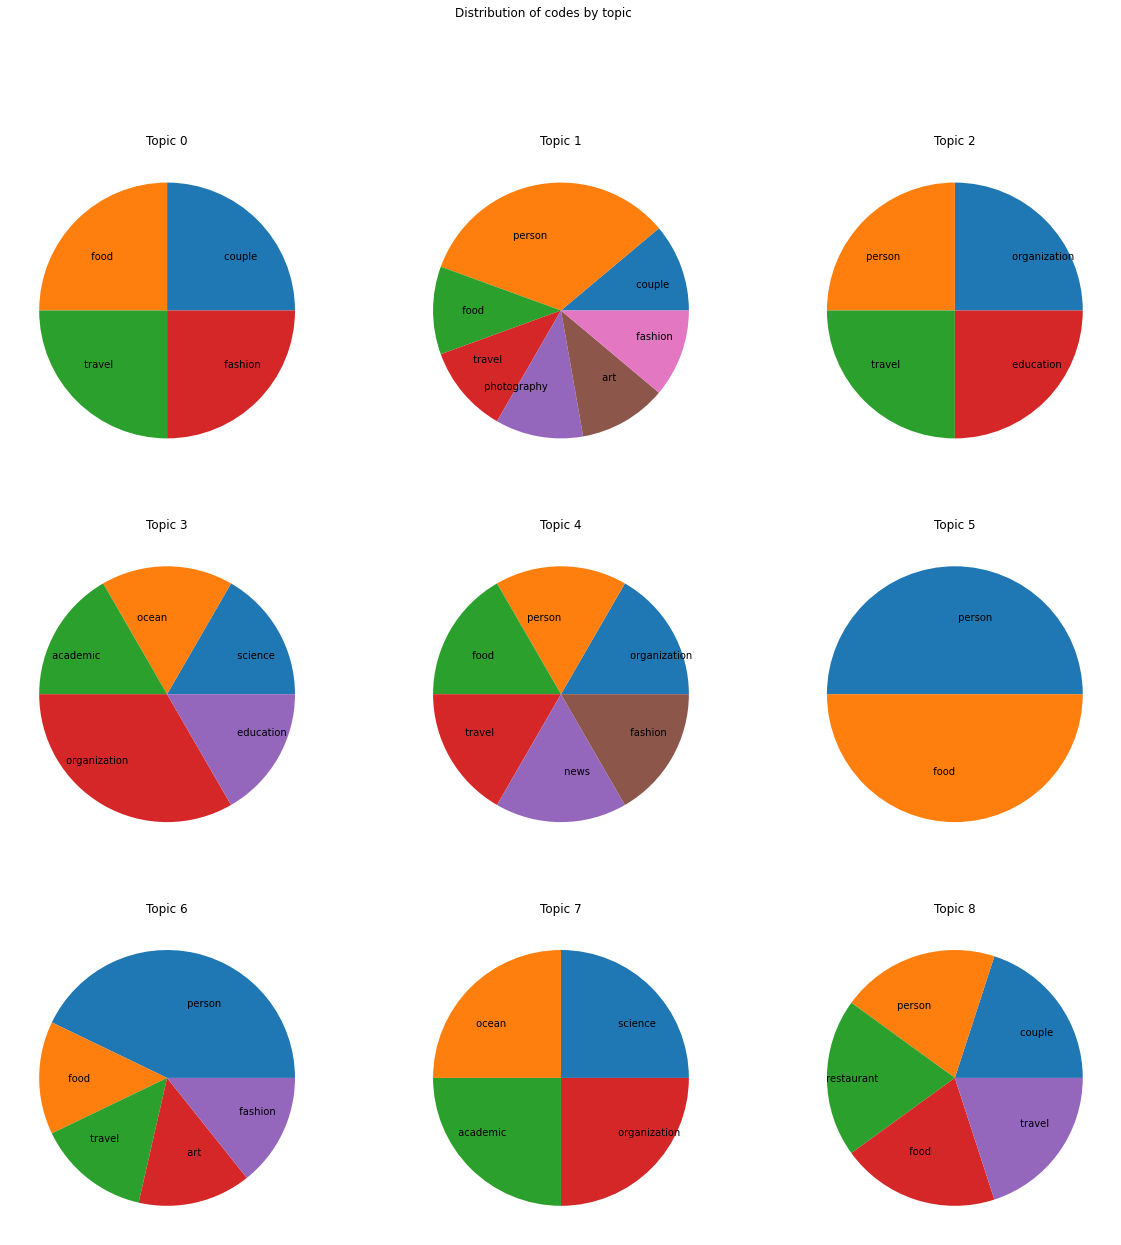

In [499]:
fig, axes = plt.subplots(len(topics)//3, 3, figsize=(20, 20))
fig.suptitle('Distribution of codes by topic')
for i, ax in enumerate(axes.flat):
    curr_topic = topics.iloc[i].drop(['user_list', 'descriptor'])
    curr_topic = curr_topic[curr_topic > 0]
    ax.pie(curr_topic, labels=curr_topic.keys(), labeldistance=.6)
    ax.set_title(f"Topic {i}")


## plotting topics over time
Finally, I used the the topic distributions generated by the LDA model to plot the distribution of topics over time. This plot shows which which groups of posters were most dominant in the user's like log in each week. In this representation, you can see how some topics peak at different times in the timeframe of the user's data.


In [500]:
topic_distribution_df.index = weekly_counts.index
topic_distribution_df.head()


,document,topic_distribution
time,,
2023-07-23,bonito_bee the_avam baltimorebanner latimes.40...,"[(4, 0.9727225)]"
2023-07-30,romeoumana asloorg theatercampthemovie theater...,"[(7, 0.98676395)]"
2023-08-06,zu.zu.gee laparasian easypeasychinesey mortgag...,"[(0, 0.98676366)]"
2023-08-13,jasminewsun vivthemole jsmn_draws overheardnew...,"[(2, 0.98902303)]"
2023-08-20,_lucerodenisse elyse_myers thealicehendersonn ...,"[(0, 0.9756732)]"


In [501]:
weekly_topics_dist_df = pd.DataFrame(columns=[f"Topic {i}" for i in range(len(topics))])

for i, row in topic_distribution_df.iterrows():
    for topic in row["topic_distribution"]:
        weekly_topics_dist_df.at[i, f"Topic {topic[0]}"] = topic[1]


weekly_topics_dist_df = weekly_topics_dist_df.fillna(0)
weekly_topics_dist_df


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
2023-07-23,0.000000,0.000000,0.000000,0.000000,0.972722,0.000000,0.000000,0.000000,0.000000,0.000000
2023-07-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.986764,0.000000,0.000000
2023-08-06,0.986764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08-13,0.000000,0.000000,0.989023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08-20,0.975673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08-27,0.000000,0.000000,0.976921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.969998
2023-09-10,0.000000,0.000000,0.000000,0.000000,0.965378,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09-17,0.000000,0.000000,0.000000,0.976921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09-24,0.000000,0.000000,0.000000,0.000000,0.974283,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: title={'center': 'Topic distribution by week'}, xlabel='Week', ylabel='Topic Distribution'>

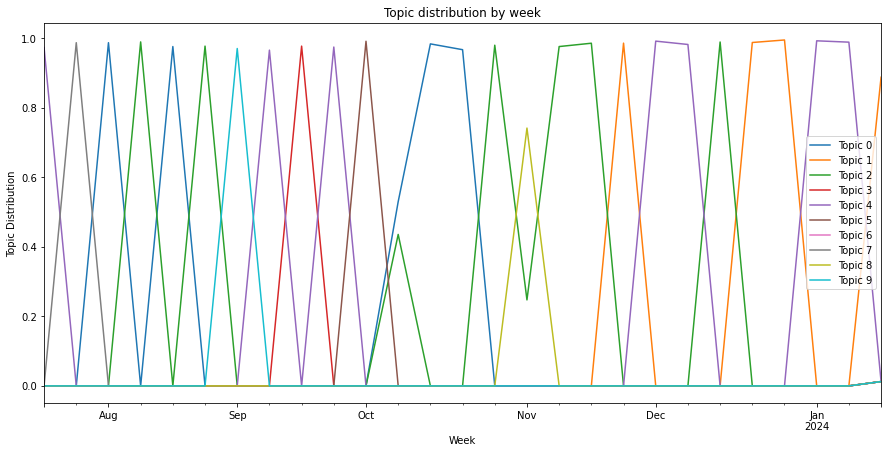

In [502]:
# fig, ax = plt.subplots()
# fig.suptitle('Topic prevalence by week')
# ax.x_label('Week number')
weekly_topics_dist_df.plot(
    figsize=(15, 7),
    title='Topic distribution by week',
    #xticks=[f"week {i}" for i in range(len(weekly_topics_dist_df))],
    xlabel='Week',
    ylabel='Topic Distribution'
)

## Conclusion
Able to garner some interesting information about usage habits. I think this methodology has potential, for example in determining how social media platforms push different kinds of content at different times. This kind of insight could be used to better understand ad targeting techniques which are often made intentionally opaque by platforms to protect their algorithms and also to encourage more consumption.

In order to reach this level of insight, however, there are multiple improvements to be made:
1. A better way to assess the quality of topic models -- In this exploration, I do not think that my topic modelling approach produced particularly insightful topics. While there are some topics where the posters in them seem to have similarities (like organizations that do ocean science or people who have cooking accounts), I don't yet have a clear way to evaluate these topics coherence beyond saying that there are relatively few codes applied to users in that topic. In fuure work, I will need to develop some assessment metric to determine the usefulness/accuracy of these topics.
1. topic modeling for posts - rather than simply modeling using some time window as a document and usernames as terms, having more detailed information about the posts users engage with in a given time period would lead to richer and more accurate topic models. For example, the captions of Instagram post could be included as terms within the document, allowing for more granularity in content analysis (at the post level rather than the user level).
1. data from posts seen -- additionally, drawing from logs of all the posts a user saw in a certain time period (rather than just the ones they engaged with) would provide more insight into the kinds of content a user experiences. From this very preliminary analysis, it seems that users do not like nearly as much content as they see and their liking behavior usually focuses on a relatively small number of accounts.
1. data from other platforms -- aggregating data from across a variety of platforms a user uses (tiktok, ig, facebook, youtube) would allow this methodology to reveal patterns and interactions across different components of the social media sociotechnical system. These patterns and interactions could signal the ways that companies treat data differently--where their algorithms align and where they differ--as well as offer a fuller picture of users' experiences on social media (which is not segmented like their data is).
1. data access -- However, the biggest challenge to all of these improvements is data access. More data is needed from more users with more regularity and more granularity. This data is understandably challenging to access as it is the primary source of revenue generation for tech companies. As next steps, I'm interested in exploring other projects that have attempted related work of collecting data that tech companies regularly have access to (for example [Mozilla's Rally](https://blog.mozilla.org/data/2021/05/05/announcing-mozilla-rally/) or [Stanford's Human Screenome Project](https://screenomics.stanford.edu/). Still, even if the technical aspects of access are overvcome, this data, especially at this granularity, can be highly sensitive and this method has the potential to become as exploitative as the practices of the tech companies that create these platforms. In the spirit of sousveillence and participatory traditions in design and research, I am interested in exploring ways to draw others into this project, framing it not as a way for researchers to better understand people, but as a way for people to better understand how social media platforms work and the impacts they may be having on their lives. With this frame, I hope that people can feel more empowered and intentional in their decision making about the roles that they want social media (and technology more broadly) to play in their lives.

## References
* Browne, S. (2015). Dark matters: On the surveillance of blackness. Duke University Press.
* Lawrence-Lightfoot, S., & Davis, J. H. (2002). The art and science of portraiture. John Wiley & Sons.
* Mann, S., Nolan, J., & Wellman, B. (2003). Sousveillance: Inventing and using wearable computing devices for data collection in surveillance environments. Surveillance & society, 1(3), 331-355.

# EXTRA

Below this point is code kept for postererity to document my explorations of ways to
pull data more functionally from instagram. This involved trying a few different
data scraping libraries and attempting to setup an IP proxy with Selenium. While I wasn't
able to get these working for this project, I hope to return to this eventually.

## DFM of time period x user likes

            user_1 | user_2 | user_3
    week_1    3        0        4
    week_2    0        6        2
    week_3    3        4        6

In [327]:
# from chatgpt

weekly_counts = df.set_index("time").groupby('user').resample('W').size().reset_index().rename(columns={0: 'count'})
weekly_counts.set_index('time', inplace=True)
pivoted_counts = weekly_counts.pivot(columns='user', values='count').fillna(0)


pivoted_counts


user,10kidsin10years,12pell,18hens,1maxwelljames,2cringy,60secdocs,_antrelle,_cocodrila,_crankykitty_,_dresswithdani,...,yinkaabroad,yoleendadong,yorkstreetsf,yosemayte,yosemitenps,yourpastreality,yousef_abuhashem,zauey,zendaaaya.96,zu.zu.gee
time,,,,,,,,,,,,,,,,,,,,,
2023-07-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-08-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2023-08-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2023-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# checking like sum to make sure nothing got dropped, should be original number of logs (1576)
pivoted_counts.sum().sum()

1576.0

## Selenium

In [42]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.proxy import Proxy, ProxyType
from selenium.webdriver.firefox.options import Options
# from seleniumwire import webdriver

In [10]:
host = 'brd.superproxy.io'
port = 22225

username = 'brd-customer-hl_badfa3bc-zone-residential_proxy1'
password = 'lt6qngrnj74z'

ff_host = f'http://{username}:{password}@{host}'

options=Options()
options.set_preference("network.proxy.type", 1)
options.set_preference("network.proxy.http",host) 
options.set_preference("network.proxy.http_port", port) 
options.set_preference("network.proxy.ssl", host) 
options.set_preference("network.proxy.ssl_port", port) 
driver = webdriver.Firefox(options=options)


In [12]:
driver.sendKeys(username)

AttributeError: 'WebDriver' object has no attribute 'sendKeys'

In [6]:
# define custom options for the Selenium driver
# options = Options()
# free proxy server URL
# proxy_server_url = "157.245.97.60"
# options.add_argument(f'--proxy-server={proxy_server_url}')

options=Options()


# myProxy = "157.245.97.60"

host = 'brd.superproxy.io'
port = 22225

username = 'brd-customer-hl_badfa3bc-zone-residential_proxy1'
password = 'lt6qngrnj74z'

PROXY = f"<{host}:{port}>"

proxy_url = f'http://{username}:{password}@{host}:{port}'

# selwireOptions = {'proxy': {'http': proxy_url, 'https': proxy_url}}


options.proxy = Proxy({
    'proxyType': ProxyType.MANUAL,
    'httpProxy': PROXY,
    #'ftpProxy': myProxy,
    'sslProxy': PROXY#,
    #'noProxy': '' # set this value as desired
    })

# driver = webdriver.Firefox(seleniumwire_options=selwireOptions)
driver = webdriver.Firefox(options=options)

There was an error managing geckodriver (builder error); using driver found in the cache


NoSuchDriverException: Message: Unable to obtain driver for firefox; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [13]:
driver.get(f'https://wolfie.dev')

## Test proxying

In [107]:
import pprint
import requests


host = 'brd.superproxy.io'
port = 22225

username = 'brd-customer-hl_badfa3bc-zone-residential_proxy1'
password = 'lt6qngrnj74z'

proxy_url = f'http://{username}:{password}@{host}:{port}'

proxies = {
    'http': proxy_url,
    'https': proxy_url
}


url = "http://lumtest.com/myip.json"
response = requests.get(url, proxies=proxies)
pprint.pprint(response.json())

{'asn': {'asnum': 5650, 'org_name': 'FRONTIER-FRTR'},
 'country': 'US',
 'geo': {'city': 'Lakeland',
         'latitude': 28.0164,
         'longitude': -81.9554,
         'lum_city': 'lakeland',
         'lum_region': 'fl',
         'postal_code': '33803',
         'region': 'FL',
         'region_name': 'Florida',
         'tz': 'America/New_York'},
 'ip': '47.200.178.124'}


## BS

In [ ]:
curr_user = "chloe.shih"
r = requests.get(f'https://www.instagram.com/{curr_user}/', headers = {'User-Agent':'Mozilla/5.0'})
r.text

In [51]:
f = open("test.html", "x")
f.write(r.text)
f.close()

In [45]:
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.body.prettify())

In [48]:
soup.get_text()

'\n\n\n\n\n\n\n\n\n\nchloe shih ✧･ﾟ (@chloe.shih) • Instagram photos and videos\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'

In [41]:
soup.find_all(class_="_ap3a")

[]